In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movie-review/up_data.csv
/kaggle/input/movie-review/dwn_test.csv
/kaggle/input/movie-review/final_data.csv
/kaggle/input/movie-review/The Dark Knight 2008.csv
/kaggle/input/movie-review/dwn_data.csv
/kaggle/input/movie-review/Man of Steel 2013.csv
/kaggle/input/movie-review/Interstellar 2014.csv
/kaggle/input/movie-review/up_train.csv
/kaggle/input/movie-review/up_test.csv
/kaggle/input/movie-review/Joker 2019.csv
/kaggle/input/movie-review/data.csv
/kaggle/input/movie-review/final_train.csv
/kaggle/input/movie-review/final_test.csv
/kaggle/input/movie-review/Prometheus 2012.csv
/kaggle/input/movie-review/dwn_train.csv


In [2]:
# Import all the tools we need


# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
%matplotlib inline

def setup_data(df):
    '''
    Preprocess some basic works
    '''
    # Drop every column except the specified column
    df = df[['rating', 'review']]
    # Drop Null rows
    df = df[~(df == 'Null').any(axis=1)]
    
    
    return df

def remove_big_review(rev):
    '''
    Removes big review greter than length
    '''
    if len(rev)>3000:
        rev = 'Null'
    return rev

def clean_text(test):
    '''
    Clean's up the unnecessary thiings of a text by replacing them with proper symbols.
    '''
    test = test.replace('<br/>', '')
    test = test.replace('--', ' ')
    test = test.replace("'", '')
    test = test.replace('"','')
#     test = test.replace('.', '')
    test = test.replace(',', '')
#     test = test.replace('?', '')
#     test = test.replace('!', '')
    test = test.replace('\n', '')
    test = test.replace('(', '')
    test = test.replace(')', '')
    test = test.lower()
    return test


def level(x):
    '''
    Changes predicted levels to human brain level.
    '''
    if x in [10, 9]:
        x = 0
    elif x in [7, 6, 8]:
        x = 1
    elif x in [5, 4]:
        x = 2
    elif x in [1, 2, 3]:
        x = 3
    return x

def level2(x):
    '''
    Changes predicted levels to human brain level.
    '''
    if x > 5:
        x = 0
    else:
        x = 1
    return x

def plot_rate(df):
    df.label.value_counts().plot(kind='bar', cmap='winter', title='IMDb Rating');

In [3]:
data= pd.read_csv('/kaggle/input/movie-review/Joker 2019.csv')
data.head(3)

,username,rating,helpful,total,date,title,review
0,JF500,10,7092,8206,10 September 2019,As a viewer that actually went to TIFF and wi...,I was a person that saw all the hype and claim...
1,MihaVrhunc,10,3512,4261,3 October 2019,Outstanding movie with a haunting performance...,"Every once in a while a movie comes, that trul..."
2,lesterarnoldpinto,10,2905,3641,7 October 2019,Only certain people can relate\n,This is a movie that only those who have felt ...


In [4]:
df = data
df.review = df.review.apply(remove_big_review)
df = setup_data(df)
# df.shape
# Clean the text removing unnecessary things
df['review'] = df['review'].apply(clean_text)
df.rating = df.rating.astype(int)
data = df

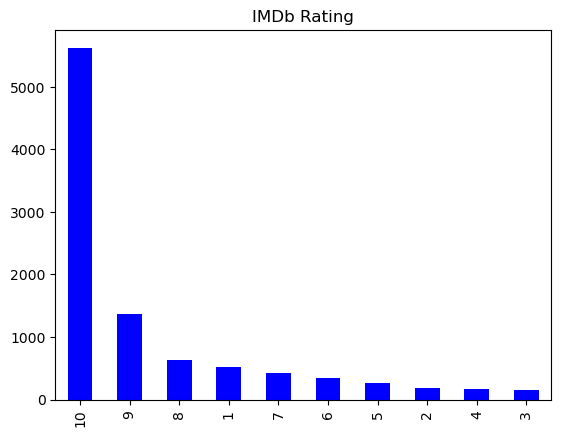

In [6]:
data.columns=['label','text']
plot_rate(data)

In [7]:
print(data.shape)
data.head(2)

(9655, 2)


,label,text
0,10,i was a person that saw all the hype and claim...
1,10,every once in a while a movie comes that truly...


In [8]:
data = data.drop(index=[row for row in data.index if  len(data.loc[row,'text'])<5])
data.shape

(9655, 2)

In [10]:
data['Revlen'] = data.text.apply(lambda x: len(x))

In [9]:
import seaborn as sb
def show_hist(column):
  plt.figure(figsize=(10,5))
  sb.histplot(column)
  plt.show()

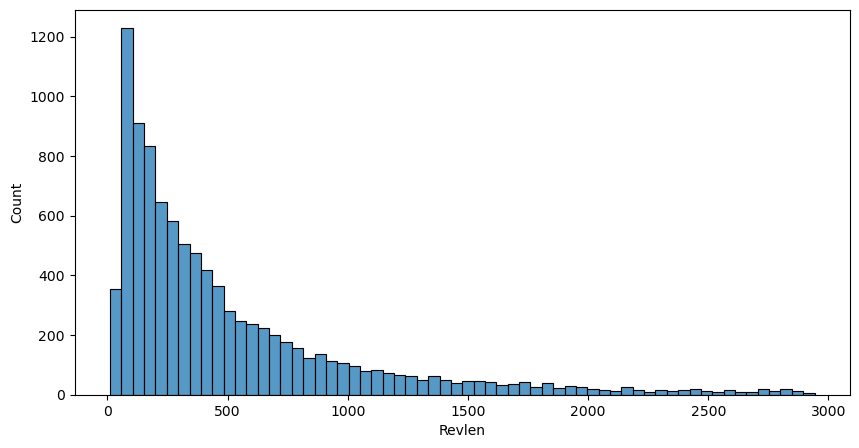

In [12]:
show_hist(data.Revlen)

In [13]:
data.Revlen

0        1120
1         538
2         438
3         842
4         529
         ... 
10041     766
10042     623
10043     462
10044     409
10045     496
Name: Revlen, Length: 9655, dtype: int64

In [ ]:
x = data['Revlen'].values

In [ ]:
sorted_array = np.sort(x)
sorted_array[:100]

In [ ]:
data.drop('Revlen', axis=1, inplace=True)

# Model S

In [13]:
sdf = data.copy()
sdf.sample()

,label,text
7331,10,tragic scary grotesque. no movie will make you...


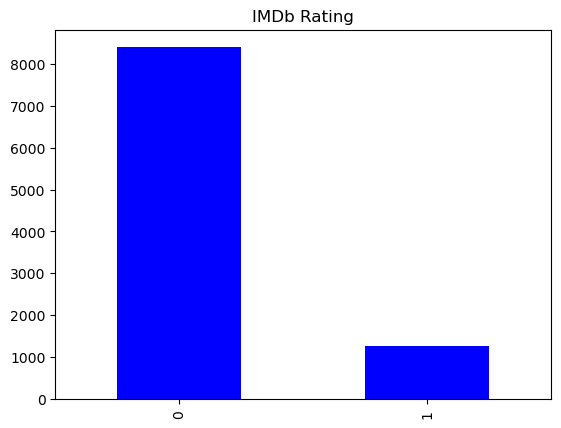

In [14]:
sdf.label = sdf.label.apply(level2)
plot_rate(sdf)

In [15]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
train, test = train_test_split(sdf, test_size=0.2)
len(train), len(test)

(7724, 1931)

In [16]:
train.head(2)

,label,text
5342,0,what a performance!!!!!! please sign joakin fo...
8539,0,a must see film. i could see phoenix playing t...


In [17]:
test.head(2)

,label,text
8639,0,must see as both screenplay and staring is abs...
5626,0,the movie is more about society and about the ...


In [18]:
train.to_csv('/kaggle/working/s_train.csv', index=False)
test.to_csv('/kaggle/working/s_test.csv', index=False)

In [19]:
from datasets import load_dataset
dataset = load_dataset('csv', data_files={'train':'/kaggle/working/s_train.csv',
                                              'test':'/kaggle/working/s_test.csv'})

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-6dd96de3a7d59db5/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


/opt/conda/lib/python3.10/site-packages/datasets/packaged_modules/csv/csv.py:154: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  csv_file_reader = pd.read_csv(file, iterator=True, dtype=dtype, **self.config.read_csv_kwargs)
/opt/conda/lib/python3.10/site-packages/datasets/packaged_modules/csv/csv.py:154: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  csv_file_reader = pd.read_csv(file, iterator=True, dtype=dtype, **self.config.read_csv_kwargs)


  0%|          | 0/2 [00:00<?, ?it/s]

In [20]:
from transformers import BertTokenizer, TFBertModel,AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True,padding=True)

tokenized_data = dataset.map(preprocess_function, batched=True)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

  0%|          | 0/8 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [21]:
from transformers import DataCollatorWithPadding
data_collator=DataCollatorWithPadding(tokenizer=tokenizer,return_tensors='tf')
id2label = {0:0,1:1}
label2id = {0:0,1:1}
from transformers import create_optimizer
import tensorflow as tf
batch_size=16
num_epochs=2

In [22]:
batch_per_epoch=len(tokenized_data["train"])
total_train_steps=int(batch_per_epoch*num_epochs)
optimizer,schedule=create_optimizer(init_lr=2e-5,num_warmup_steps=0,num_train_steps=total_train_steps)

In [23]:
from transformers import TFAutoModelForSequenceClassification
modelS=TFAutoModelForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',num_labels=2,id2label=id2label,label2id=label2id,ignore_mismatched_sizes=True
    
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [24]:
tf_train_set = modelS.prepare_tf_dataset(
    tokenized_data["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)
tf_validation_set = modelS.prepare_tf_dataset(
    tokenized_data["test"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [25]:
modelS.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

In [26]:
# Slice the dataset from length 100 to 10
sliced_dataset_train = tf_train_set.take(100)
sliced_dataset_test = tf_validation_set.take(100)

In [27]:
modelS.fit(x=tf_train_set,validation_data=tf_validation_set, epochs=3)

Epoch 1/3
482/482 [==============================] - 335s 631ms/step - loss: 0.2337 - accuracy: 0.9081 - val_loss: 0.1753 - val_accuracy: 0.9358
Epoch 2/3
482/482 [==============================] - 299s 622ms/step - loss: 0.1258 - accuracy: 0.9531 - val_loss: 0.1598 - val_accuracy: 0.9368
Epoch 3/3
482/482 [==============================] - 299s 620ms/step - loss: 0.0493 - accuracy: 0.9831 - val_loss: 0.2523 - val_accuracy: 0.9270


In [28]:
test.head(2)

,label,text
8639,0,must see as both screenplay and staring is abs...
5626,0,the movie is more about society and about the ...


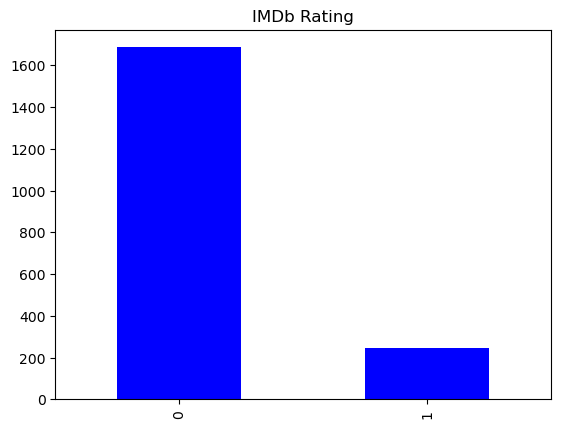

In [29]:
plot_rate(test)

In [30]:
true = list(test.label)
test_text = list(test.text)

In [31]:
def custom_test(text, model):
    '''
    Test your model in a custom text
    '''
    inputs=tokenizer(text,return_tensors="tf")
    tf_outputs = model(inputs)                                  
    tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1) 
    # print(tf_predictions)
    logits=modelS(**inputs).logits
    # print("Logits :",logits)
    predicted_class_id = int(tf.math.argmax(logits, axis=-1)[0])
    return predicted_class_id

100%|██████████| 1931/1931 [06:20<00:00,  5.07it/s]


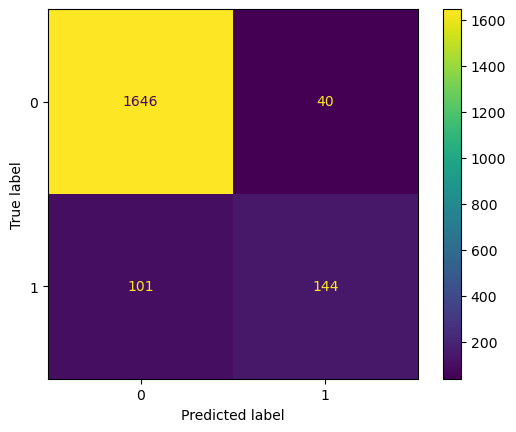

In [32]:
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn import metrics

preds = []
for text in tqdm(test_text):
    preds.append(custom_test(text, modelS))


con_mat = confusion_matrix(true, preds)
con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[0,1])
con_mat_plot.plot()
plt.show()

In [33]:
from sklearn.metrics import accuracy_score


# Calculate accuracy score
accuracy = accuracy_score(true, preds)

print(f"Accuracy: {accuracy*100:.2f}%", )

Accuracy: 92.70%


In [ ]:
 # Create a new TensorBoard session everytime we train a model
tensorboard = tensorboard_callbacks()
# Create a early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)
# Fit the model to the data  passing it the callbacks we created
model.fit(x=train_data, 
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])

# ModelUP

In [74]:
udf = data.copy()
udf = udf[udf['label'] > 5].copy()

(8385, 2)


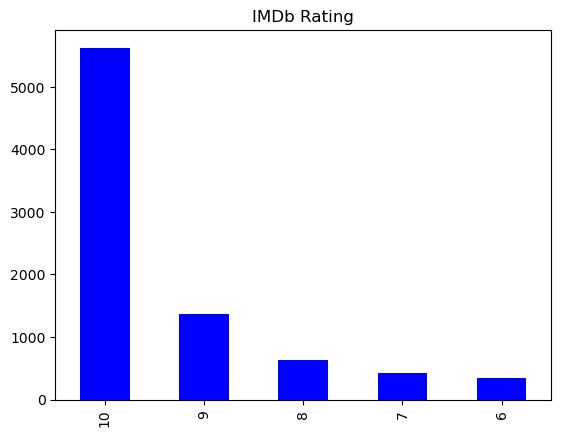

In [75]:
print(udf.shape)
plot_rate(udf)

In [36]:
def level_up(x):
    '''
    Changes predicted levels to human brain level.
    '''
    if x in [10, 9]:
        x = 0
    elif x in [7, 6, 8]:
        x = 1
    return x

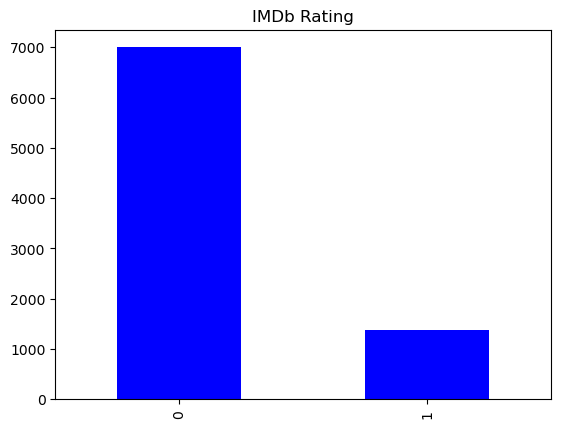

In [76]:
udf['label'] = udf['label'].apply(level_up)
plot_rate(udf)

In [77]:
def drop_ten(n, df):
    
    for i in range(n):
        ind_to_drop = np.random.randint(1,len(df))
        try:
            if df.label[ind_to_drop] == 0:
                df = df.drop(ind_to_drop)
        except:
            continue
    return df

In [78]:
udf = udf.reset_index(drop=True)
udf.head()

,label,text
0,0,i was a person that saw all the hype and claim...
1,0,every once in a while a movie comes that truly...
2,0,this is a movie that only those who have felt ...
3,0,truly a masterpiece the best hollywood film of...
4,0,joaquin phoenix gives a tour de force performa...


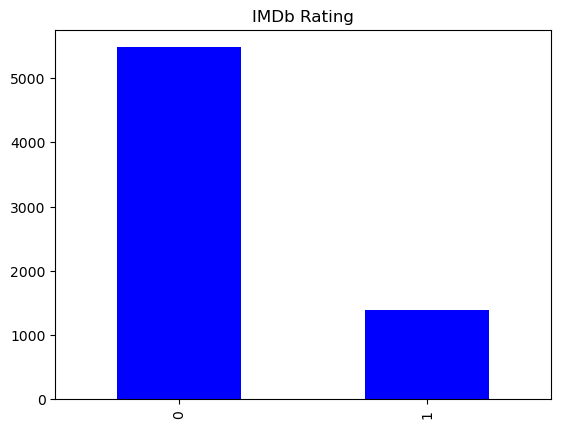

In [79]:
udf = drop_ten(2000, udf)
plot_rate(udf)

In [80]:
np.random.seed(42)
train, test = train_test_split(udf, test_size=0.2)
len(train), len(test)

(5491, 1373)

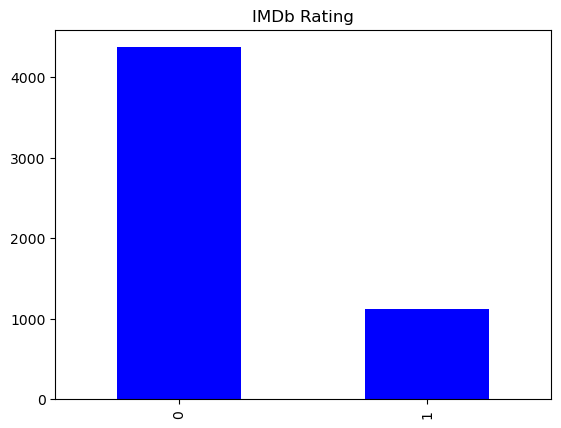

In [81]:
plot_rate(train)

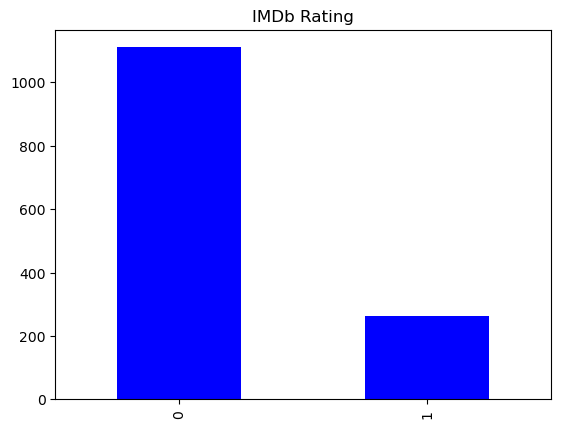

In [82]:
plot_rate(test)

In [88]:
train.to_csv('/kaggle/working/up_train.csv', index=False)
test.to_csv('/kaggle/working/up_test.csv', index=False)

In [89]:
dataset = load_dataset('csv', data_files={'train':'/kaggle/working/up_train.csv',
                                              'test':'/kaggle/working/up_test.csv'})

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

tokenized_data = dataset.map(preprocess_function, batched=True)

data_collator=DataCollatorWithPadding(tokenizer=tokenizer,return_tensors='tf')

id2label = {0:0,1:1}
label2id = {0:0,1:1}
from transformers import create_optimizer
import tensorflow as tf
batch_size=16
num_epochs=2
batch_per_epoch=len(tokenized_data["train"])
total_train_steps=int(batch_per_epoch*num_epochs)
optimizer,schedule=create_optimizer(init_lr=2e-5,num_warmup_steps=0,num_train_steps=total_train_steps)

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-ef9197b21eeb3f8d/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


/opt/conda/lib/python3.10/site-packages/datasets/packaged_modules/csv/csv.py:154: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  csv_file_reader = pd.read_csv(file, iterator=True, dtype=dtype, **self.config.read_csv_kwargs)
/opt/conda/lib/python3.10/site-packages/datasets/packaged_modules/csv/csv.py:154: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  csv_file_reader = pd.read_csv(file, iterator=True, dtype=dtype, **self.config.read_csv_kwargs)


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [90]:
modelUP=TFAutoModelForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',num_labels=2,id2label=id2label,label2id=label2id,ignore_mismatched_sizes=True
    
)
tf_train_set = modelUP.prepare_tf_dataset(
    tokenized_data["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)
tf_validation_set = modelUP.prepare_tf_dataset(
    tokenized_data["test"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [91]:
modelUP.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

In [92]:
modelUP.fit(x=tf_train_set,validation_data=tf_validation_set, epochs=2)

Epoch 1/2
343/343 [==============================] - 231s 600ms/step - loss: 0.3870 - accuracy: 0.8333 - val_loss: 0.3235 - val_accuracy: 0.8667
Epoch 2/2
343/343 [==============================] - 204s 594ms/step - loss: 0.2613 - accuracy: 0.8981 - val_loss: 0.3305 - val_accuracy: 0.8631


100%|██████████| 1373/1373 [04:34<00:00,  4.99it/s]


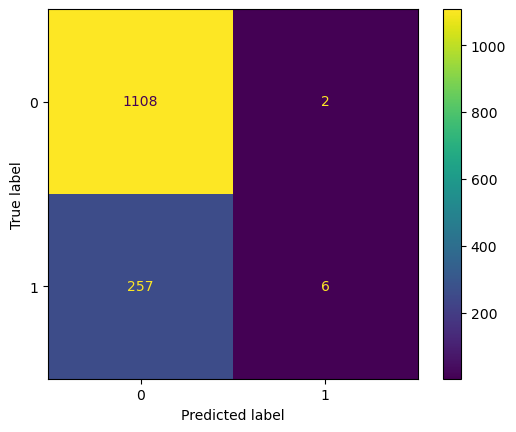

In [93]:
true = list(test.label)
test_text = list(test.text)

predup = []
for text in tqdm(test_text):
    predup.append(custom_test(text, modelUP))
    
con_mat = confusion_matrix(true, predup)

con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[0,1])
con_mat_plot.plot()
plt.show()

# Model Down

In [94]:
ddf = data[data['label'] <= 5].copy()
ddf.label.value_counts()

1    515
5    264
2    179
4    167
3    145
Name: label, dtype: int64

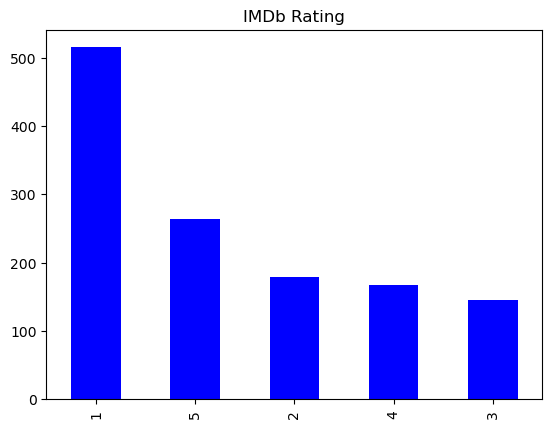

In [95]:
plot_rate(ddf)

In [97]:
def level_down(x):
    '''
    Changes predicted levels to human brain level.
    '''
    if x in [4, 5, 3]:
        x = 0
    elif x in [1, 2]:
        x = 1
    return x

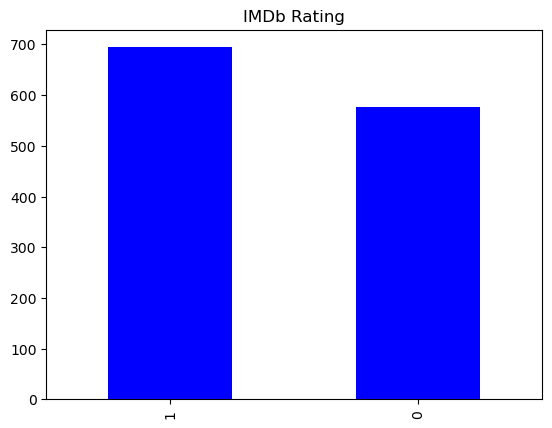

In [98]:
ddf['label'] = ddf['label'].apply(level_down)
plot_rate(ddf)


In [99]:
np.random.seed(42)
train, test = train_test_split(ddf, test_size=0.2)
len(train), len(test)

(1016, 254)

In [100]:
train.to_csv('/kaggle/working/d_train.csv', index=False)
test.to_csv('/kaggle/working/d_test.csv', index=False)

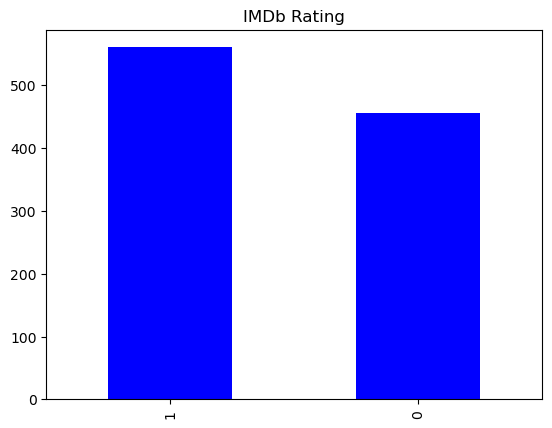

In [101]:
plot_rate(train)

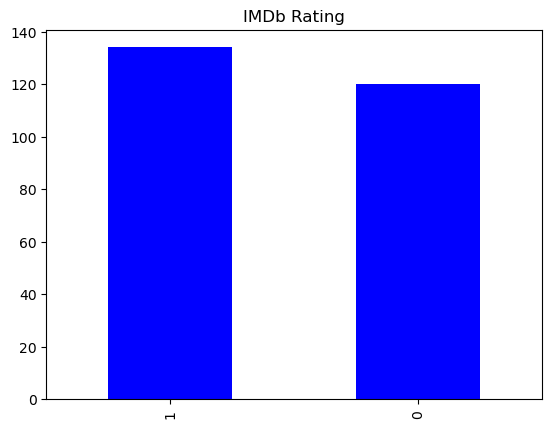

In [102]:
plot_rate(test)

In [103]:
dataset = load_dataset('csv', data_files={'train':'/kaggle/working/d_train.csv',
                                              'test':'/kaggle/working/d_test.csv'})

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

tokenized_data = dataset.map(preprocess_function, batched=True)

data_collator=DataCollatorWithPadding(tokenizer=tokenizer,return_tensors='tf')

id2label = {0:0,1:1}
label2id = {0:0,1:1}
from transformers import create_optimizer
import tensorflow as tf
batch_size=16
num_epochs=2
batch_per_epoch=len(tokenized_data["train"])
total_train_steps=int(batch_per_epoch*num_epochs)
optimizer,schedule=create_optimizer(init_lr=2e-5,num_warmup_steps=0,num_train_steps=total_train_steps)

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-2c0e19dbe7e9677a/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


/opt/conda/lib/python3.10/site-packages/datasets/packaged_modules/csv/csv.py:154: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  csv_file_reader = pd.read_csv(file, iterator=True, dtype=dtype, **self.config.read_csv_kwargs)
/opt/conda/lib/python3.10/site-packages/datasets/packaged_modules/csv/csv.py:154: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  csv_file_reader = pd.read_csv(file, iterator=True, dtype=dtype, **self.config.read_csv_kwargs)


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [104]:
modelDN=TFAutoModelForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',num_labels=2,id2label=id2label,label2id=label2id,ignore_mismatched_sizes=True
    
)
tf_train_set = modelDN.prepare_tf_dataset(
    tokenized_data["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)
tf_validation_set = modelDN.prepare_tf_dataset(
    tokenized_data["test"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [105]:
modelDN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

In [106]:
modelDN.fit(x=tf_train_set,validation_data=tf_validation_set, epochs=2)

Epoch 1/2
63/63 [==============================] - 64s 608ms/step - loss: 0.6772 - accuracy: 0.5635 - val_loss: 0.6629 - val_accuracy: 0.5787
Epoch 2/2
63/63 [==============================] - 37s 581ms/step - loss: 0.5918 - accuracy: 0.6746 - val_loss: 0.6763 - val_accuracy: 0.6535


Token indices sequence length is longer than the specified maximum sequence length for this model (554 > 512). Running this sequence through the model will result in indexing errors


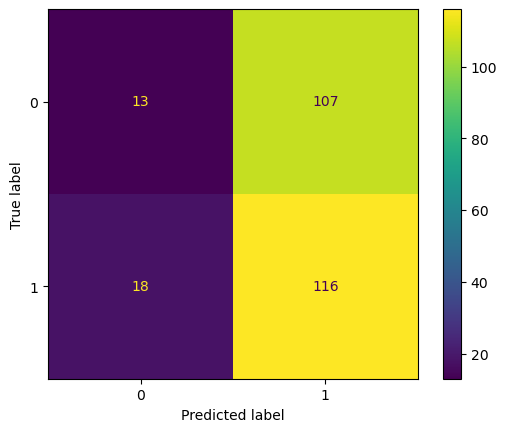

In [107]:
true = list(test.label)
test_text = list(test.text)

preddn = []
for text in test_text:
    preddn.append(custom_test(text, modelDN))
    
con_mat = confusion_matrix(true, preddn)

con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[0,1])
con_mat_plot.plot()
plt.show()

# final

In [108]:
ft = data.copy()

In [109]:
ft.label = ft.label.apply(level)

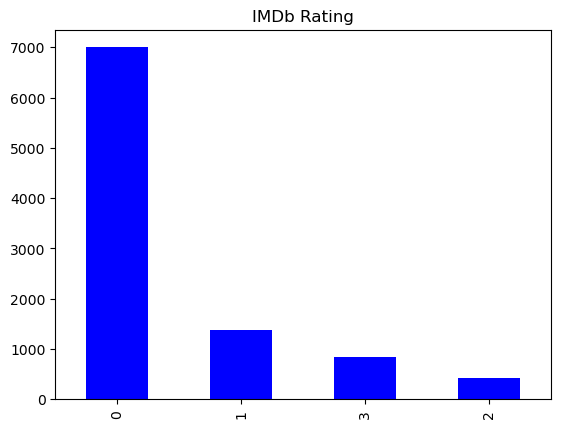

In [110]:
plot_rate(ft)

In [112]:
np.random.seed(42)
train, test = train_test_split(ft, test_size=0.2)
len(train), len(test)

(7724, 1931)

In [113]:
def final_prediction(text):
    '''
    Implements our awsome algorithm and gives final output
    '''
    inputs=tokenizer(text,return_tensors="tf")
    tf_outputs = modelS(inputs)                                  
    tf_predictions =np.argmax( tf.nn.softmax(tf_outputs[0], axis=-1) )
   
    if tf_predictions==0:
        tf_outputs = modelUP(inputs)                                  
        tf_predictions_final =np.argmax( tf.nn.softmax(tf_outputs[0], axis=-1) ) 
        
    else:
        tf_outputs = modelDN(inputs)                                  
        tf_predictions_final =np.argmax( tf.nn.softmax(tf_outputs[0], axis=-1) )+2
         
    return tf_predictions_final

In [114]:
n = 1931
true = list(test.label)
test_text = list(test.text)

In [115]:
prediction = []
for text in tqdm(test_text):
    prediction.append(final_prediction(text))

100%|██████████| 1931/1931 [06:40<00:00,  4.82it/s]


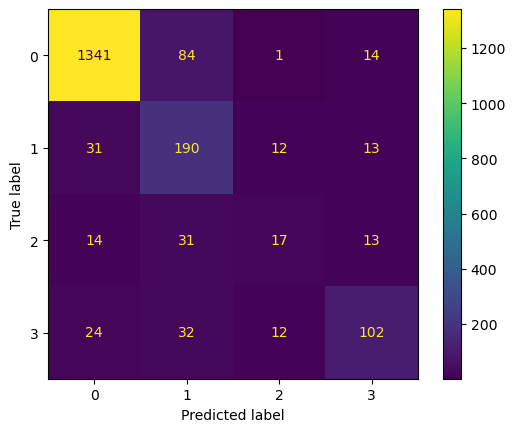

In [116]:
con_mat = confusion_matrix(true, prediction)

con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[0,1, 2, 3])
con_mat_plot.plot()
plt.show()

In [117]:
# Calculate accuracy score
accuracy = accuracy_score(true, prediction)

print(f"Accuracy: {accuracy*100:.2f}%", )

Accuracy: 85.45%
